## Evgenii Safronov, Mikhail Kurenkov, Taras Melnik

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from numpy.linalg import inv
from matplotlib.font_manager import FontProperties
%matplotlib inline

## Reading the data

In [2]:
year, month, monthly_flux, monthly_number = [],[],[],[]

In [3]:
with open('data_group6.txt') as f:
    for line in f:
        y,m,mf,mn =  map(float, line.split())
        year.append( y )
        month.append( m )
        monthly_flux.append( mf )
        monthly_number.append( mn )

In [4]:
year = np.array(year)
month = np.array(month)
monthly_flux = np.array(monthly_flux)
monthly_number = np.array(monthly_number)

## Alternative reading

In [5]:
year, month, monthly_flux, monthly_number = np.loadtxt('data_group6.txt', unpack = True)

## Plotting 

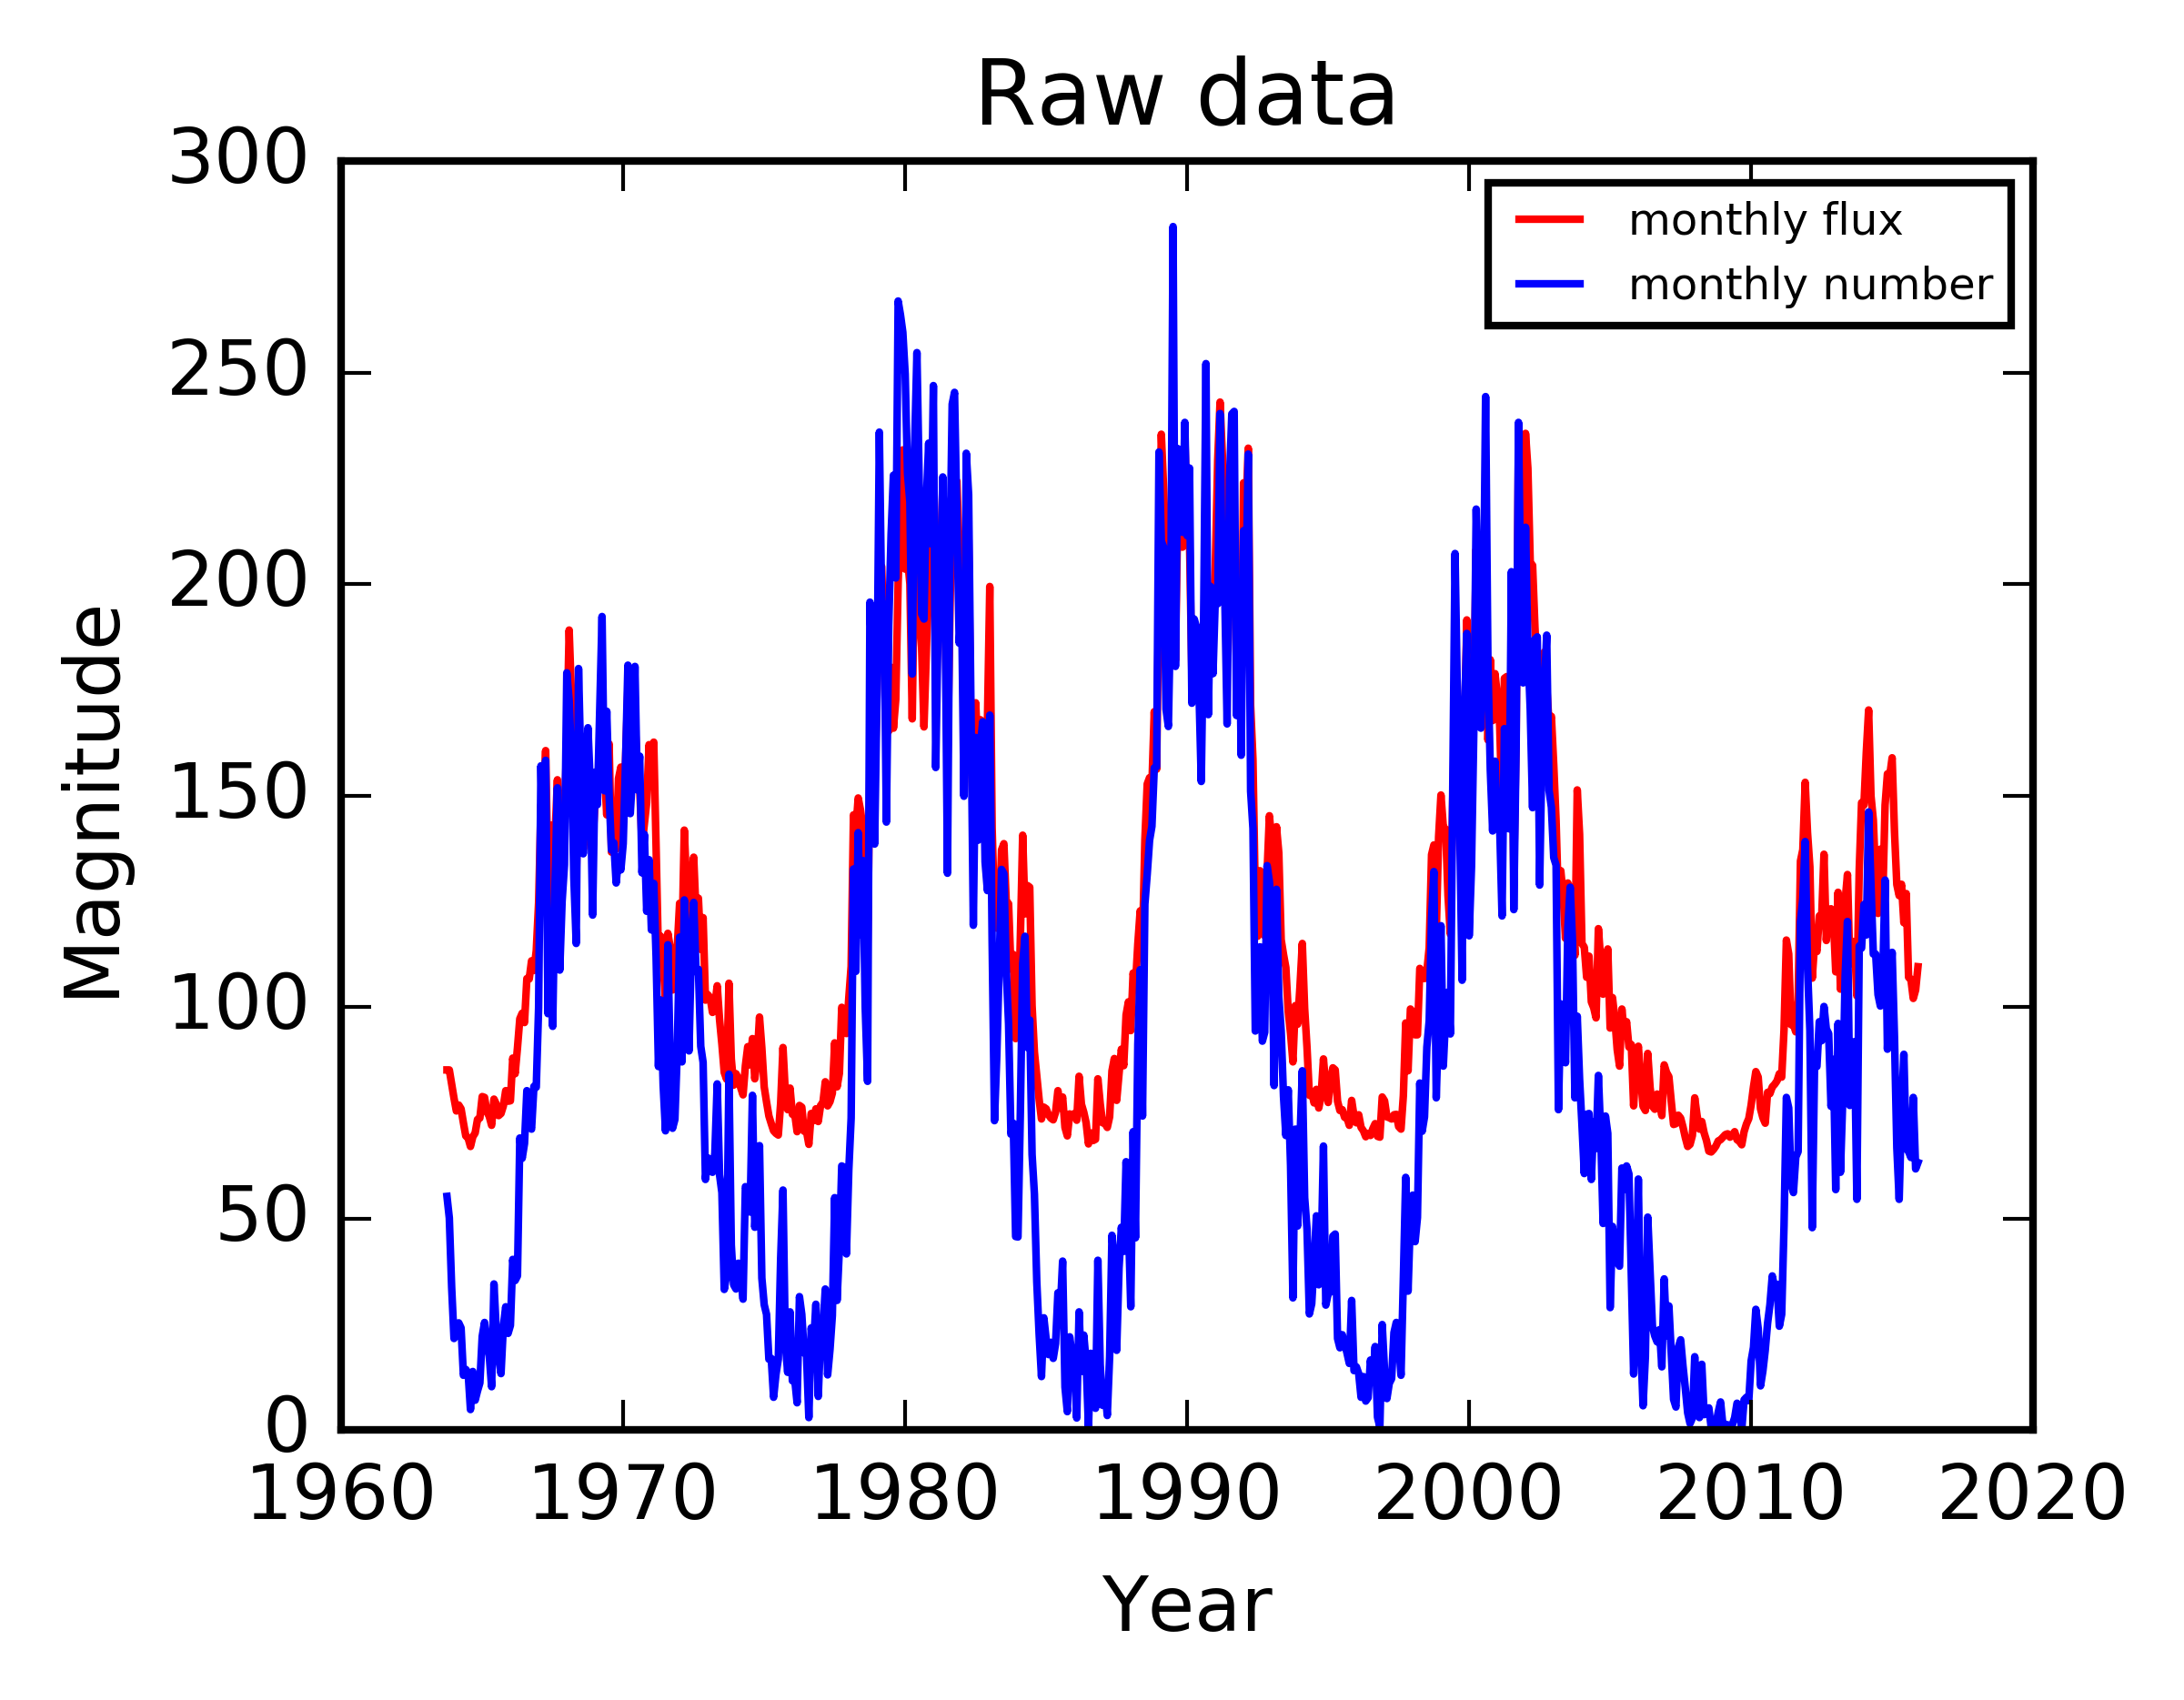

In [6]:
fig, ax = plt.subplots(1,1, figsize=(4,3), dpi = 600)
ax.set_title('Raw data')
ax.plot((year + month/12), monthly_flux,'r', label = 'monthly flux')
ax.plot((year + month/12), monthly_number,'b', label = 'monthly number')
fontP = FontProperties()
fontP.set_size('xx-small')
ax.legend(prop = fontP, loc = 'upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Magnitude');
#fig.show();

## Smoothing

In [7]:
averager = np.ones(13)
averager[0] = averager[-1] = 0.5
averager/=12

In [8]:
mf_smooth = np.convolve(monthly_flux,  averager, mode = 'same')
mf_smooth[:6] = monthly_flux[:6]
mf_smooth[-6:] = monthly_flux[-6:]
mn_smooth = np.convolve(monthly_number,averager, mode = 'same')
mn_smooth[:6] = monthly_number[:6]
mn_smooth[-6:] = monthly_number[-6:]

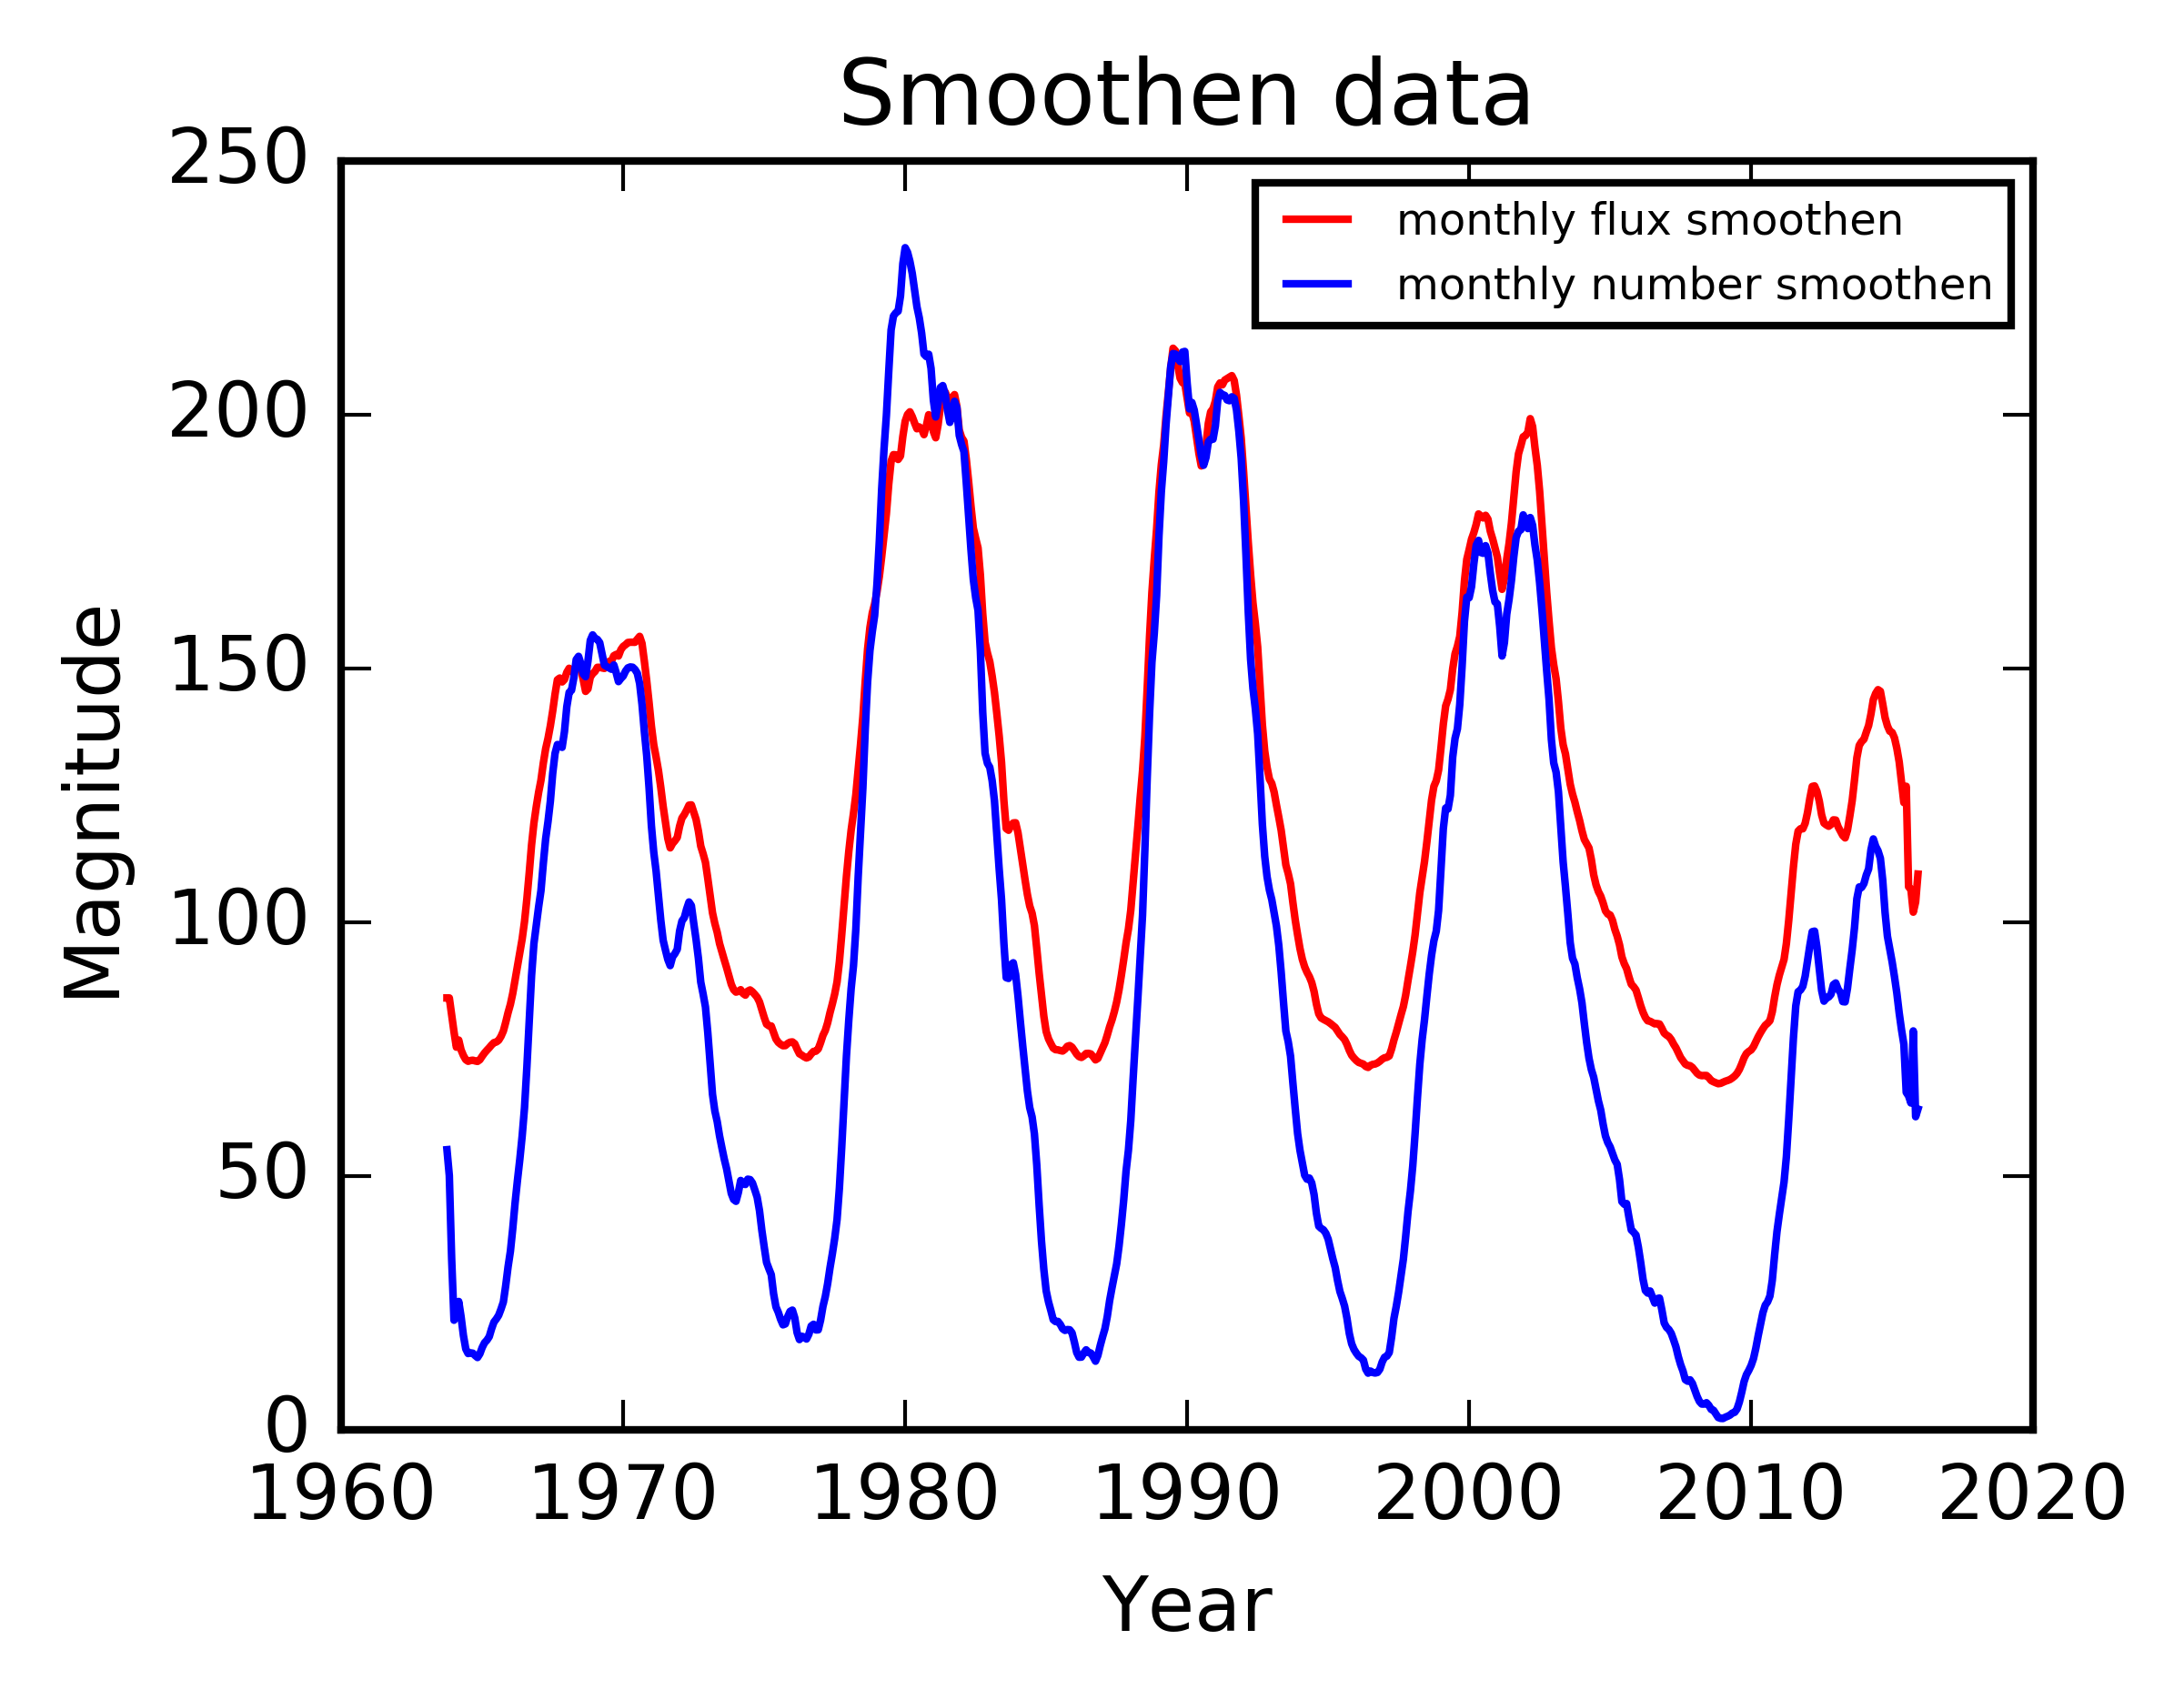

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4,3), dpi = 600)
ax.set_title('Smoothen data')
ax.plot((year + month/12), mf_smooth,'r', label = 'monthly flux smoothen')
ax.plot((year + month/12), mn_smooth,'b', label = 'monthly number smoothen')
fontP = FontProperties()
fontP.set_size('xx-small')
ax.legend(prop = fontP, loc = 'upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Magnitude');
#fig.show()

## Linear regression

In [10]:
F = mf_smooth
sp = mn_smooth
R = np.array([np.ones_like(sp), sp, sp**2, sp**3])
R = R.transpose()

In [11]:
beta = (inv(R.transpose().dot(R))).dot(R.transpose()).dot(F)

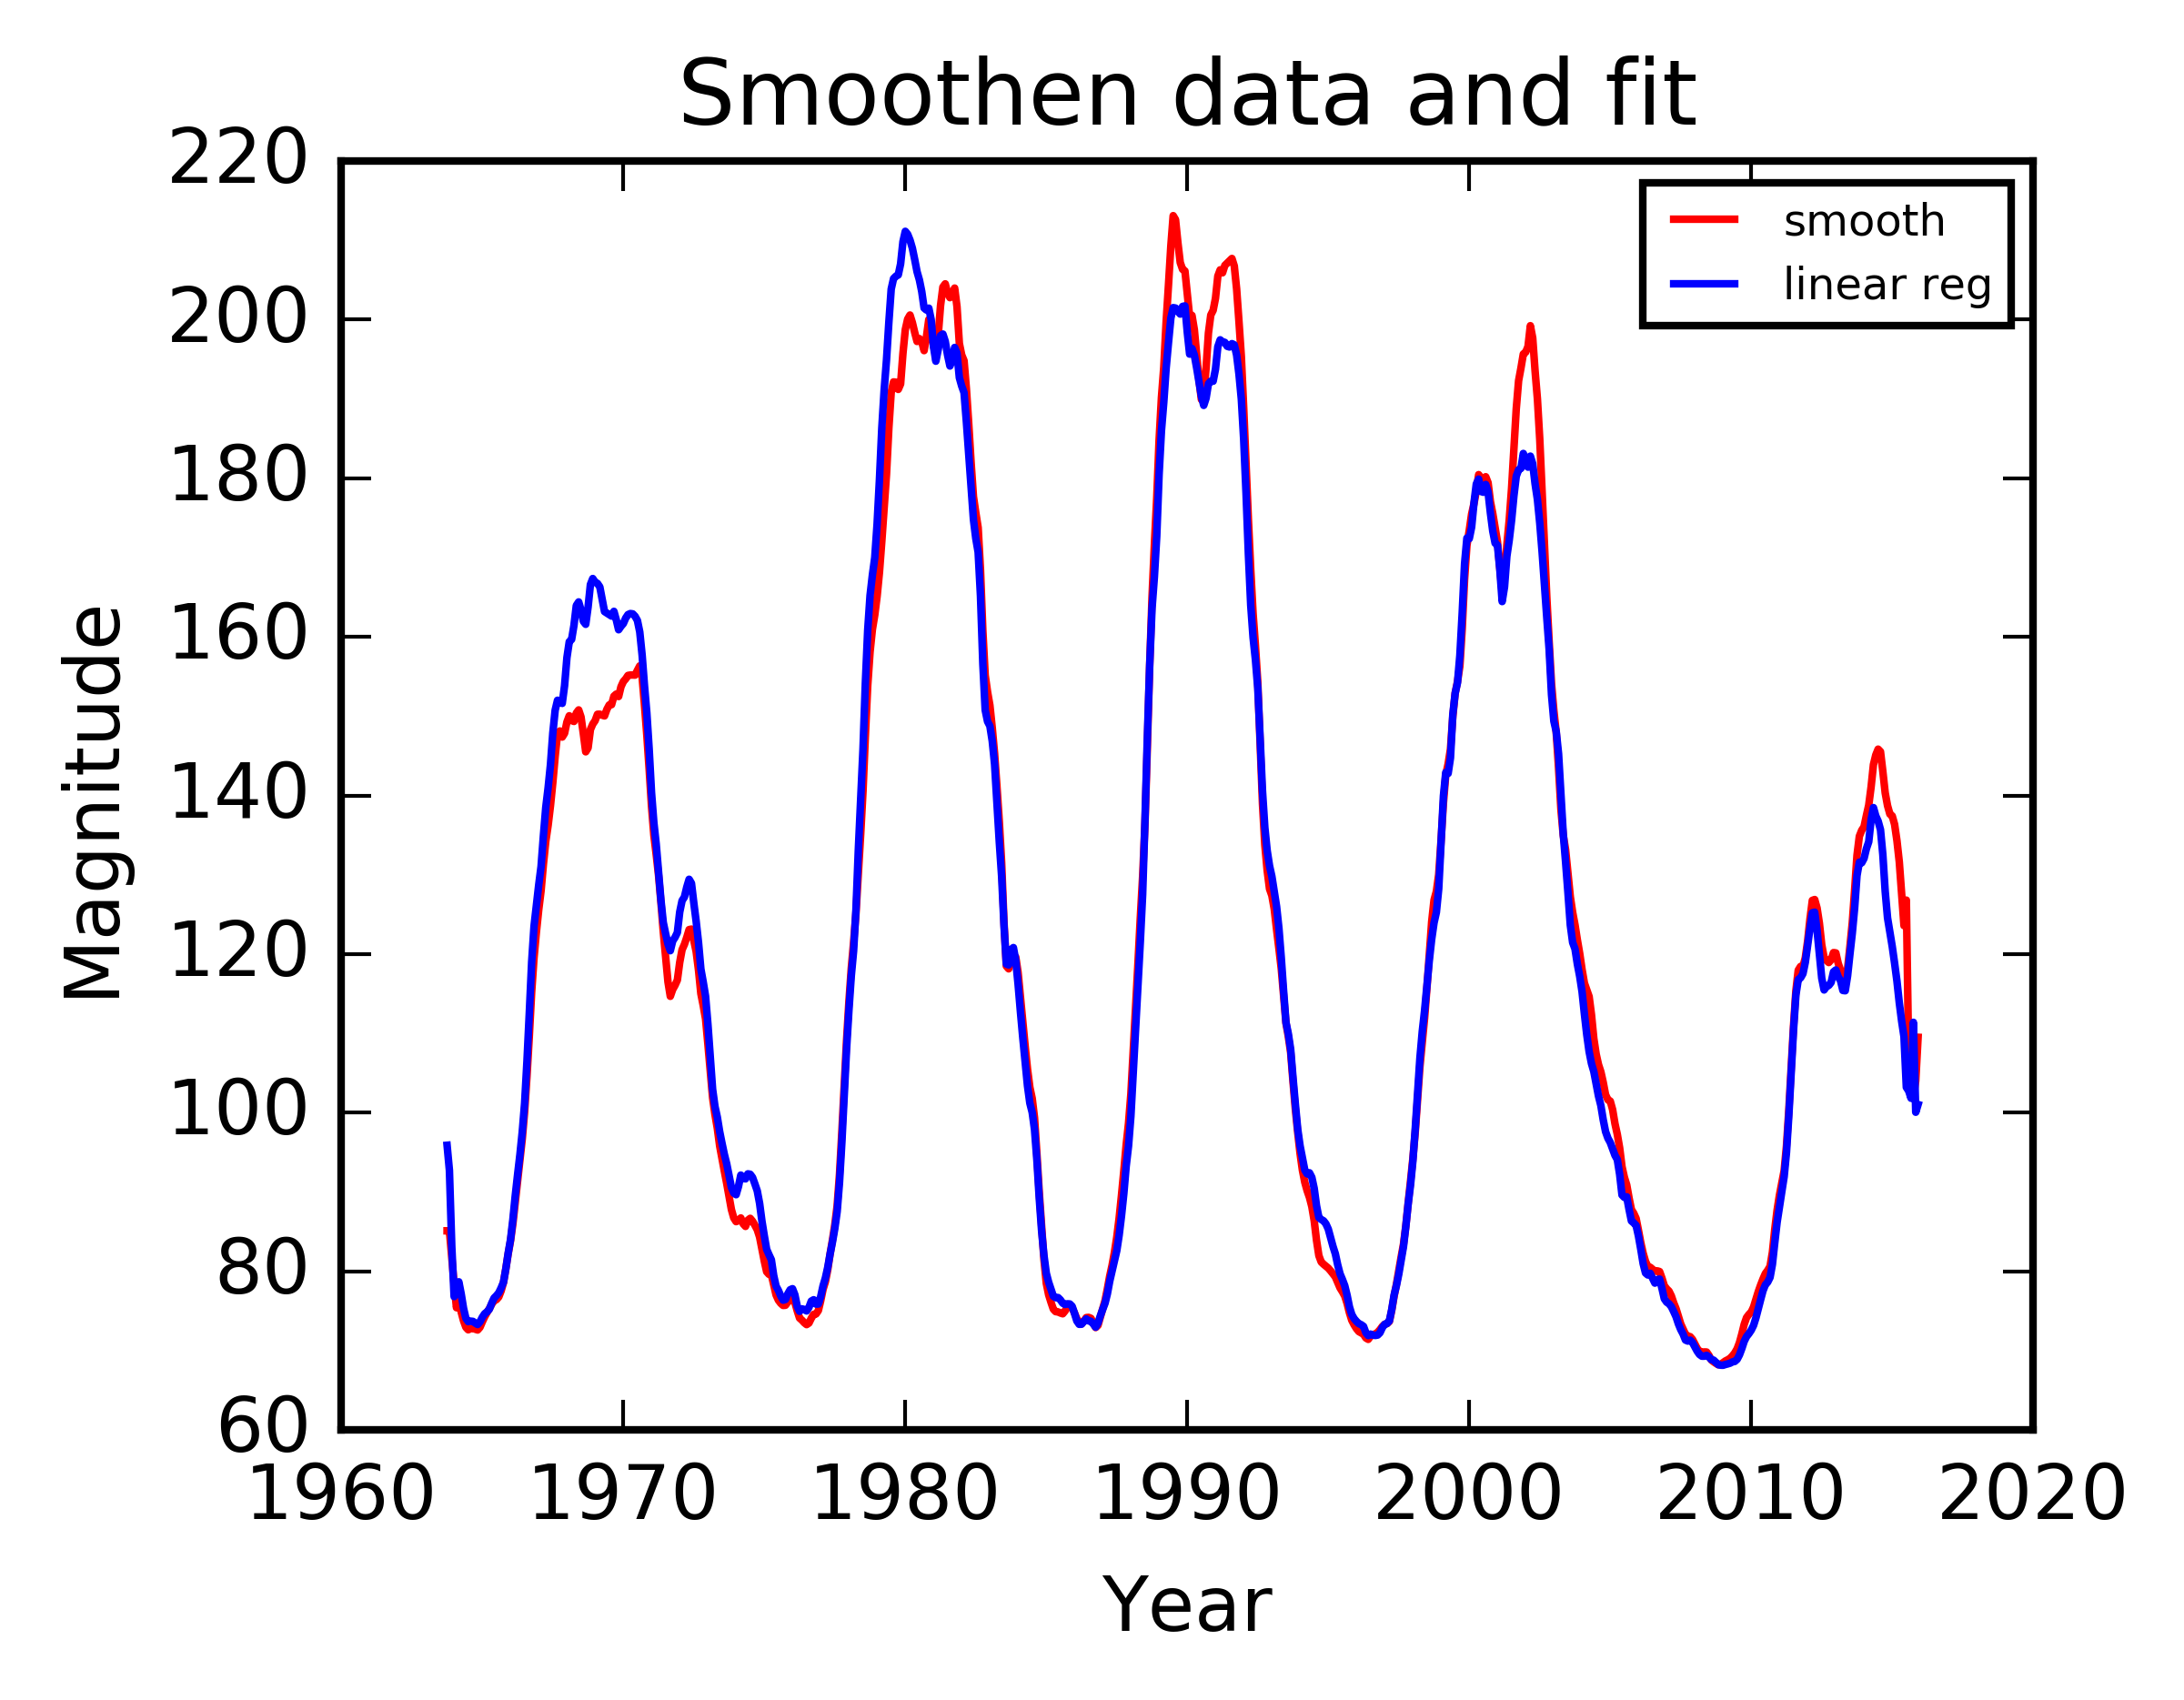

In [12]:
fig, ax = plt.subplots(1,1, figsize=(4,3), dpi = 600)
ax.set_title('Smoothen data and fit')
ax.plot((year + month/12), mf_smooth,'r',label = 'smooth')
ax.plot((year + month/12), R.dot(beta) ,'b', label = 'linear reg')
fontP = FontProperties()
fontP.set_size('xx-small')
ax.legend(prop = fontP, loc = 'upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Magnitude');
#fig.show();

## Dispersion

In [13]:
sigma_sq = np.sum( (F - R.dot(beta))**2 ) / (len(F) - 1)

In [14]:
print('sigma_squared = %.2f' % (sigma_sq))

sigma_squared = 30.18


## Today we learned how to use linear regression in matrix form via Python.